початкові параметри: k = 5.000, b = -1.500
моя реалізація:      k = 5.014, b = -1.673
np.polyfit:          k = 5.014, b = -1.673


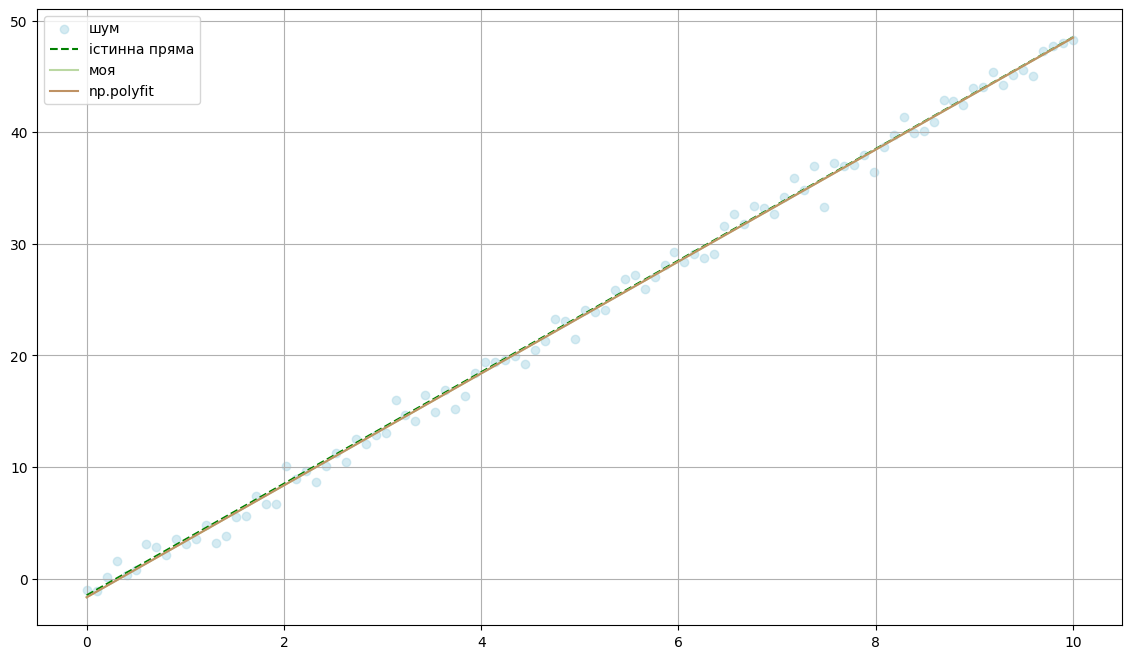

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(0, 10, 100)
noise = np.random.normal(0, 1, x.shape)
k = 5
b = -1.5
y = k * x + b + noise  

def sqa(x, y):
    x_avg = np.mean(x)
    y_avg = np.mean(y)
    k = np.sum((x - x_avg) * (y - y_avg)) / np.sum((x - x_avg)**2)
    b = y_avg - k * x_avg
    return k, b

k_my, b_my = sqa(x, y)
k_np, b_np = np.polyfit(x, y, 1)

print(f"початкові параметри: k = {k:.3f}, b = {b:.3f}")
print(f"моя реалізація:      k = {k_my:.3f}, b = {b_my:.3f}")
print(f"np.polyfit:          k = {k_np:.3f}, b = {b_np:.3f}")

plt.figure(figsize=(14, 8))
plt.scatter(x, y, color='lightblue', alpha=0.5, label='шум')
plt.plot(x, k * x + b, 'g--', label='істинна пряма')
plt.plot(x, k_my * x + b_my, '#BBD8A3', label='моя')
plt.plot(x, k_np * x + b_np, '#BF9264', label='np.polyfit')
plt.legend()
plt.grid(True)
plt.show()


початкові параметри: k = 5.000, b = -1.500
градієнтний спуск:   k = 5.011, b = -1.656
моя реалізація:      k = 5.014, b = -1.673


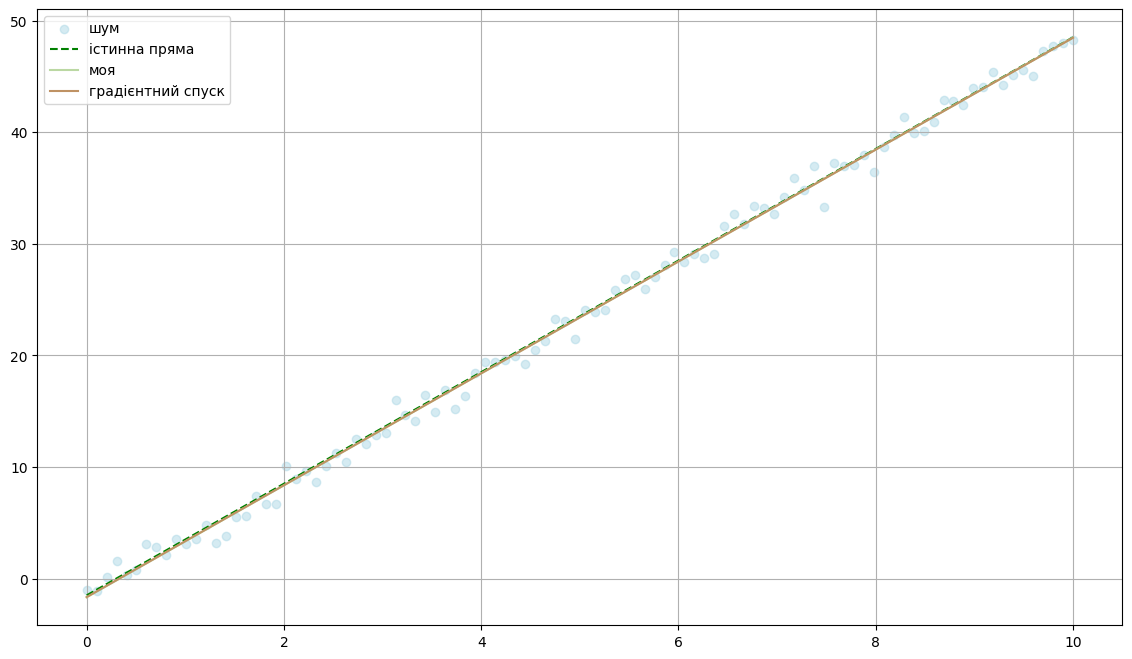

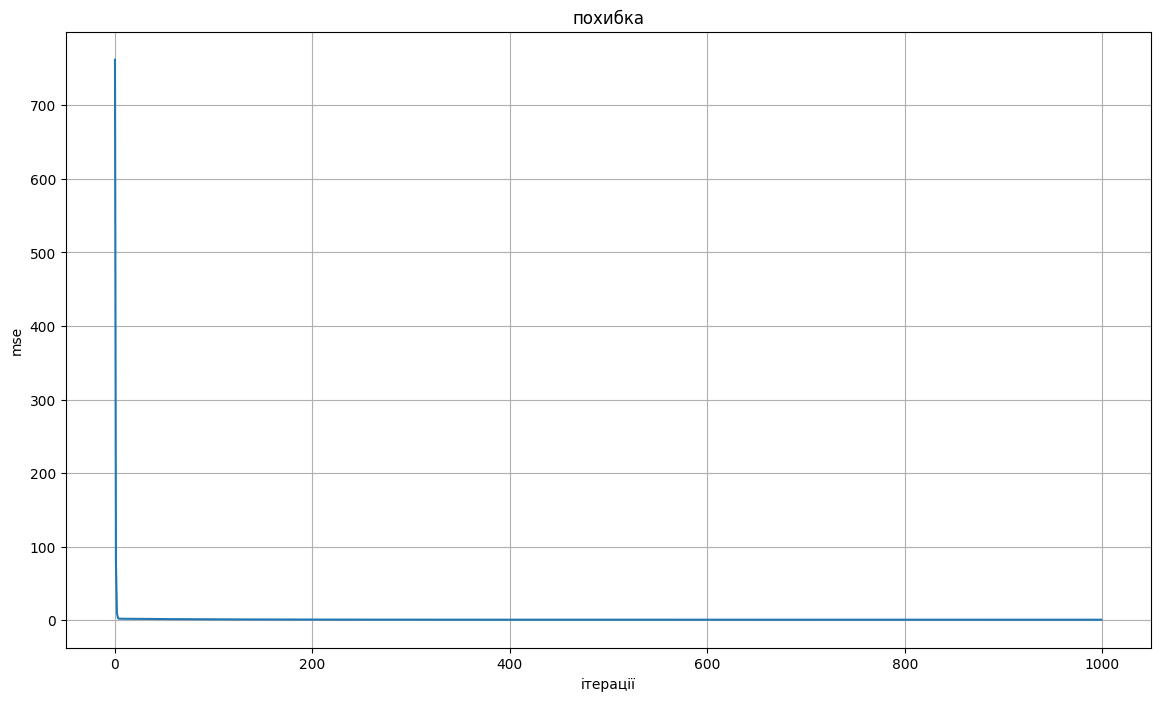

In [ ]:
def gradient(x, y, learn=0.01, iter=1000):
    n = len(x)
    k, b = 0.0, 0.0
    error = []

    for i in range(iter):
        y_pred = k * x + b
        e = y - y_pred
        mse = (e ** 2).mean()
        error.append(mse)

        dk = (-2 / n) * np.sum(x * e)
        db = (-2 / n) * np.sum(e)

        k -= learn * dk
        b -= learn * db
    return k, b, error

k_gr, b_gr, error = gradient(x, y, learn=0.01, iter=1000)

print(f"початкові параметри: k = {k:.3f}, b = {b:.3f}")
print(f"градієнтний спуск:   k = {k_gr:.3f}, b = {b_gr:.3f}")
print(f"моя реалізація:      k = {k_my:.3f}, b = {b_my:.3f}")

plt.figure(figsize=(14, 8))
plt.scatter(x, y, color='lightblue', alpha=0.5, label='шум')
plt.plot(x, k * x + b, 'g--', label='істинна пряма')
plt.plot(x, k_my * x + b_my, '#BBD8A3', label='моя')
plt.plot(x, k_gr * x + b_gr, '#BF9264', label='градієнтний спуск')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(error)
plt.title("похибка")
plt.xlabel("ітерації")
plt.ylabel("mse")
plt.grid(True)
plt.show()